# Assignment 2: Data Preprocessing and Visualization with the Titanic Dataset

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
from sklearn.datasets import fetch_openml

###2. Load the Titanic Dataset

The Titanic dataset is a well-known dataset that contains information about passengers on the Titanic, including whether they survived or not. Here are some common features found in the Titanic dataset:


1. **pclass:** Passenger Class - The class of the ticket the passenger purchased (1st, 2nd, or 3rd).
2. **name:** The name of the passenger.
3. **sex:** The gender of the passenger (male or female).
4. **age:** The age of the passenger. This feature may contain missing values.
5. **sibsp:** The number of siblings/spouses aboard the Titanic.
6. **parch:** The number of parents/children aboard the Titanic.
7. **ticket:** The ticket number.
8. **fare:** The amount of money the passenger paid for the ticket.
9. **cabin:** The cabin number where the passenger stayed. This feature may contain missing values.
10. **embarked:** The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton).
10. **boat:** This column indicates the lifeboat number for those passengers that were able to board a lifeboat.
11. **body:** The body identification number assigned to individuals who did not survive the disaster.  THIS COLUMN SHOULD BE DROPPED FOR SURVIVAL PREDICTION SINCE IT WAS ASSIGNED AFTER THE DISASTER TO THE RECOVERED DEAD BODIES.
12. **home.dest:** The home destination of the passenger.

The target variable in the dataset is typically:
14. **survived:** Indicates whether the passenger survived (1) or not (0).

It's important to note that the dataset may contain missing values in certain features, and preprocessing steps such as imputation or removal of missing data may be necessary before analysis. Additionally, some features may need further transformation, such as converting categorical variables into numerical representations for machine learning models.

In [2]:
# Load the Titanic dataset from OpenML
titanic_data = fetch_openml(name='titanic', version=1, as_frame=True)

# Combine features and target into a DataFrame
df = pd.concat([titanic_data['data'], titanic_data['target']], axis=1)

### STUDENT START CODING BELOW HERE

### 3. EDA

In [3]:
#@title 3A

# Add your code below
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [4]:
#@title 3B

# Add your code below
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1046 non-null   float64 
 4   sibsp      1309 non-null   int64   
 5   parch      1309 non-null   int64   
 6   ticket     1309 non-null   object  
 7   fare       1308 non-null   float64 
 8   cabin      295 non-null    object  
 9   embarked   1307 non-null   category
 10  boat       486 non-null    object  
 11  body       121 non-null    float64 
 12  home.dest  745 non-null    object  
 13  survived   1309 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 116.8+ KB
None


In [5]:
  #@title 3C - Missing Value Counts

# Add your code below

missing_values = df.isnull().sum()

missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage Missing (%)": missing_percentage})

print(missing_df)

           Missing Values  Percentage Missing (%)
pclass                  0                0.000000
name                    0                0.000000
sex                     0                0.000000
age                   263               20.091673
sibsp                   0                0.000000
parch                   0                0.000000
ticket                  0                0.000000
fare                    1                0.076394
cabin                1014               77.463713
embarked                2                0.152788
boat                  823               62.872422
body                 1188               90.756303
home.dest             564               43.086325
survived                0                0.000000


In [6]:
#@title 3D

# Add your code below

# Calculate the number of passengers who survived and died
survived_count = df['survived'].value_counts().get('1', 0)
died_count = df['survived'].value_counts().get('0', 0)

print(f"Number of passengers who survived: {survived_count}")
print(f"Number of passengers who died: {died_count}")

# Calculate the percentage of survivors who boarded a lifeboat
survivors_with_lifeboats = df[(df['survived'] == '1') & df['boat'].notnull()].shape[0]
survivor_percentage_boats = (survivors_with_lifeboats / survived_count) * 100

print(f"Percentage of survivors who boarded a lifeboat: {survivor_percentage_boats:.2f}%")

# Calculate the percentage of those who died whose bodies were recovered

recovered_bodies = df[(df['survived'] == '0') & df['body'].notnull()].shape[0]
death_percentage_bodies_recovered = (recovered_bodies / died_count) * 100

print(f"Percentage of deceased passengers whose bodies were recovered: {death_percentage_bodies_recovered:.2f}%")



Number of passengers who survived: 500
Number of passengers who died: 809
Percentage of survivors who boarded a lifeboat: 95.40%
Percentage of deceased passengers whose bodies were recovered: 14.96%


In [7]:
#@title 3E - Delete 'boat' and 'body'

# Add your code below
df.drop(['boat', 'body'], axis=1, inplace=True, errors='ignore')

print(df.columns)


Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked', 'home.dest', 'survived'],
      dtype='object')


In [9]:
#@title 3F - Encoding

# Add your code below

# Encode categorical features as numeric
df_encoded = pd.get_dummies(df, drop_first=True)


print(df_encoded.info())
print(df_encoded.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 2796 entries, pclass to survived_1
dtypes: bool(2791), float64(2), int64(3)
memory usage: 3.5 MB
None
   pclass      age  sibsp  parch      fare  \
0       1  29.0000      0      0  211.3375   
1       1   0.9167      1      2  151.5500   
2       1   2.0000      1      2  151.5500   
3       1  30.0000      1      2  151.5500   
4       1  25.0000      1      2  151.5500   

   name_Abbott, Master. Eugene Joseph  name_Abbott, Mr. Rossmore Edward  \
0                               False                             False   
1                               False                             False   
2                               False                             False   
3                               False                             False   
4                               False                             False   

   name_Abbott, Mrs. Stanton (Rosa Hunt)  name_Abelseth, Miss. Karen Marie  \
0        

###3G - Data Visualizations

<Figure size 1500x1200 with 0 Axes>

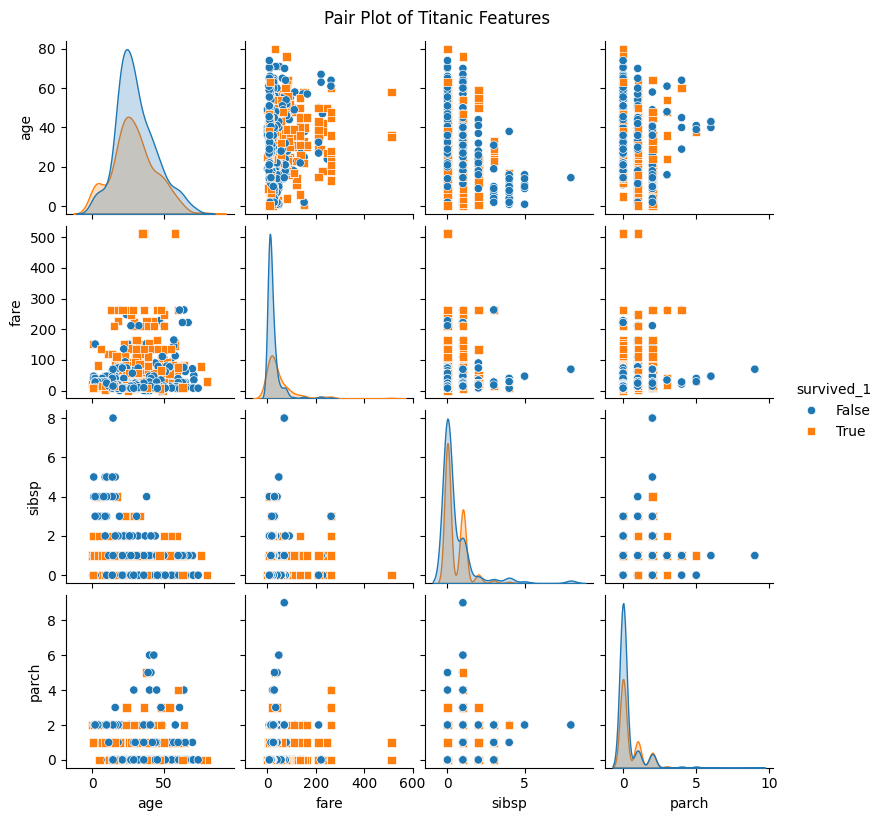

In [10]:
# Select numeric columns for visualization
graph_col = ["age", "fare", "sibsp", "parch"]

# Generate the pair plot with compatible markers
plt.figure(figsize=(15, 12))
pairplot = sns.pairplot(df_encoded, hue="survived_1", vars=graph_col,
                        markers=["o", "s"], height=2, aspect=1)

pairplot.fig.suptitle("Pair Plot of Titanic Features", y=1.02)
plt.show()


Generating QQ plot for: pclass
Generating QQ plot for: age
Generating QQ plot for: sibsp
Generating QQ plot for: parch
Generating QQ plot for: fare


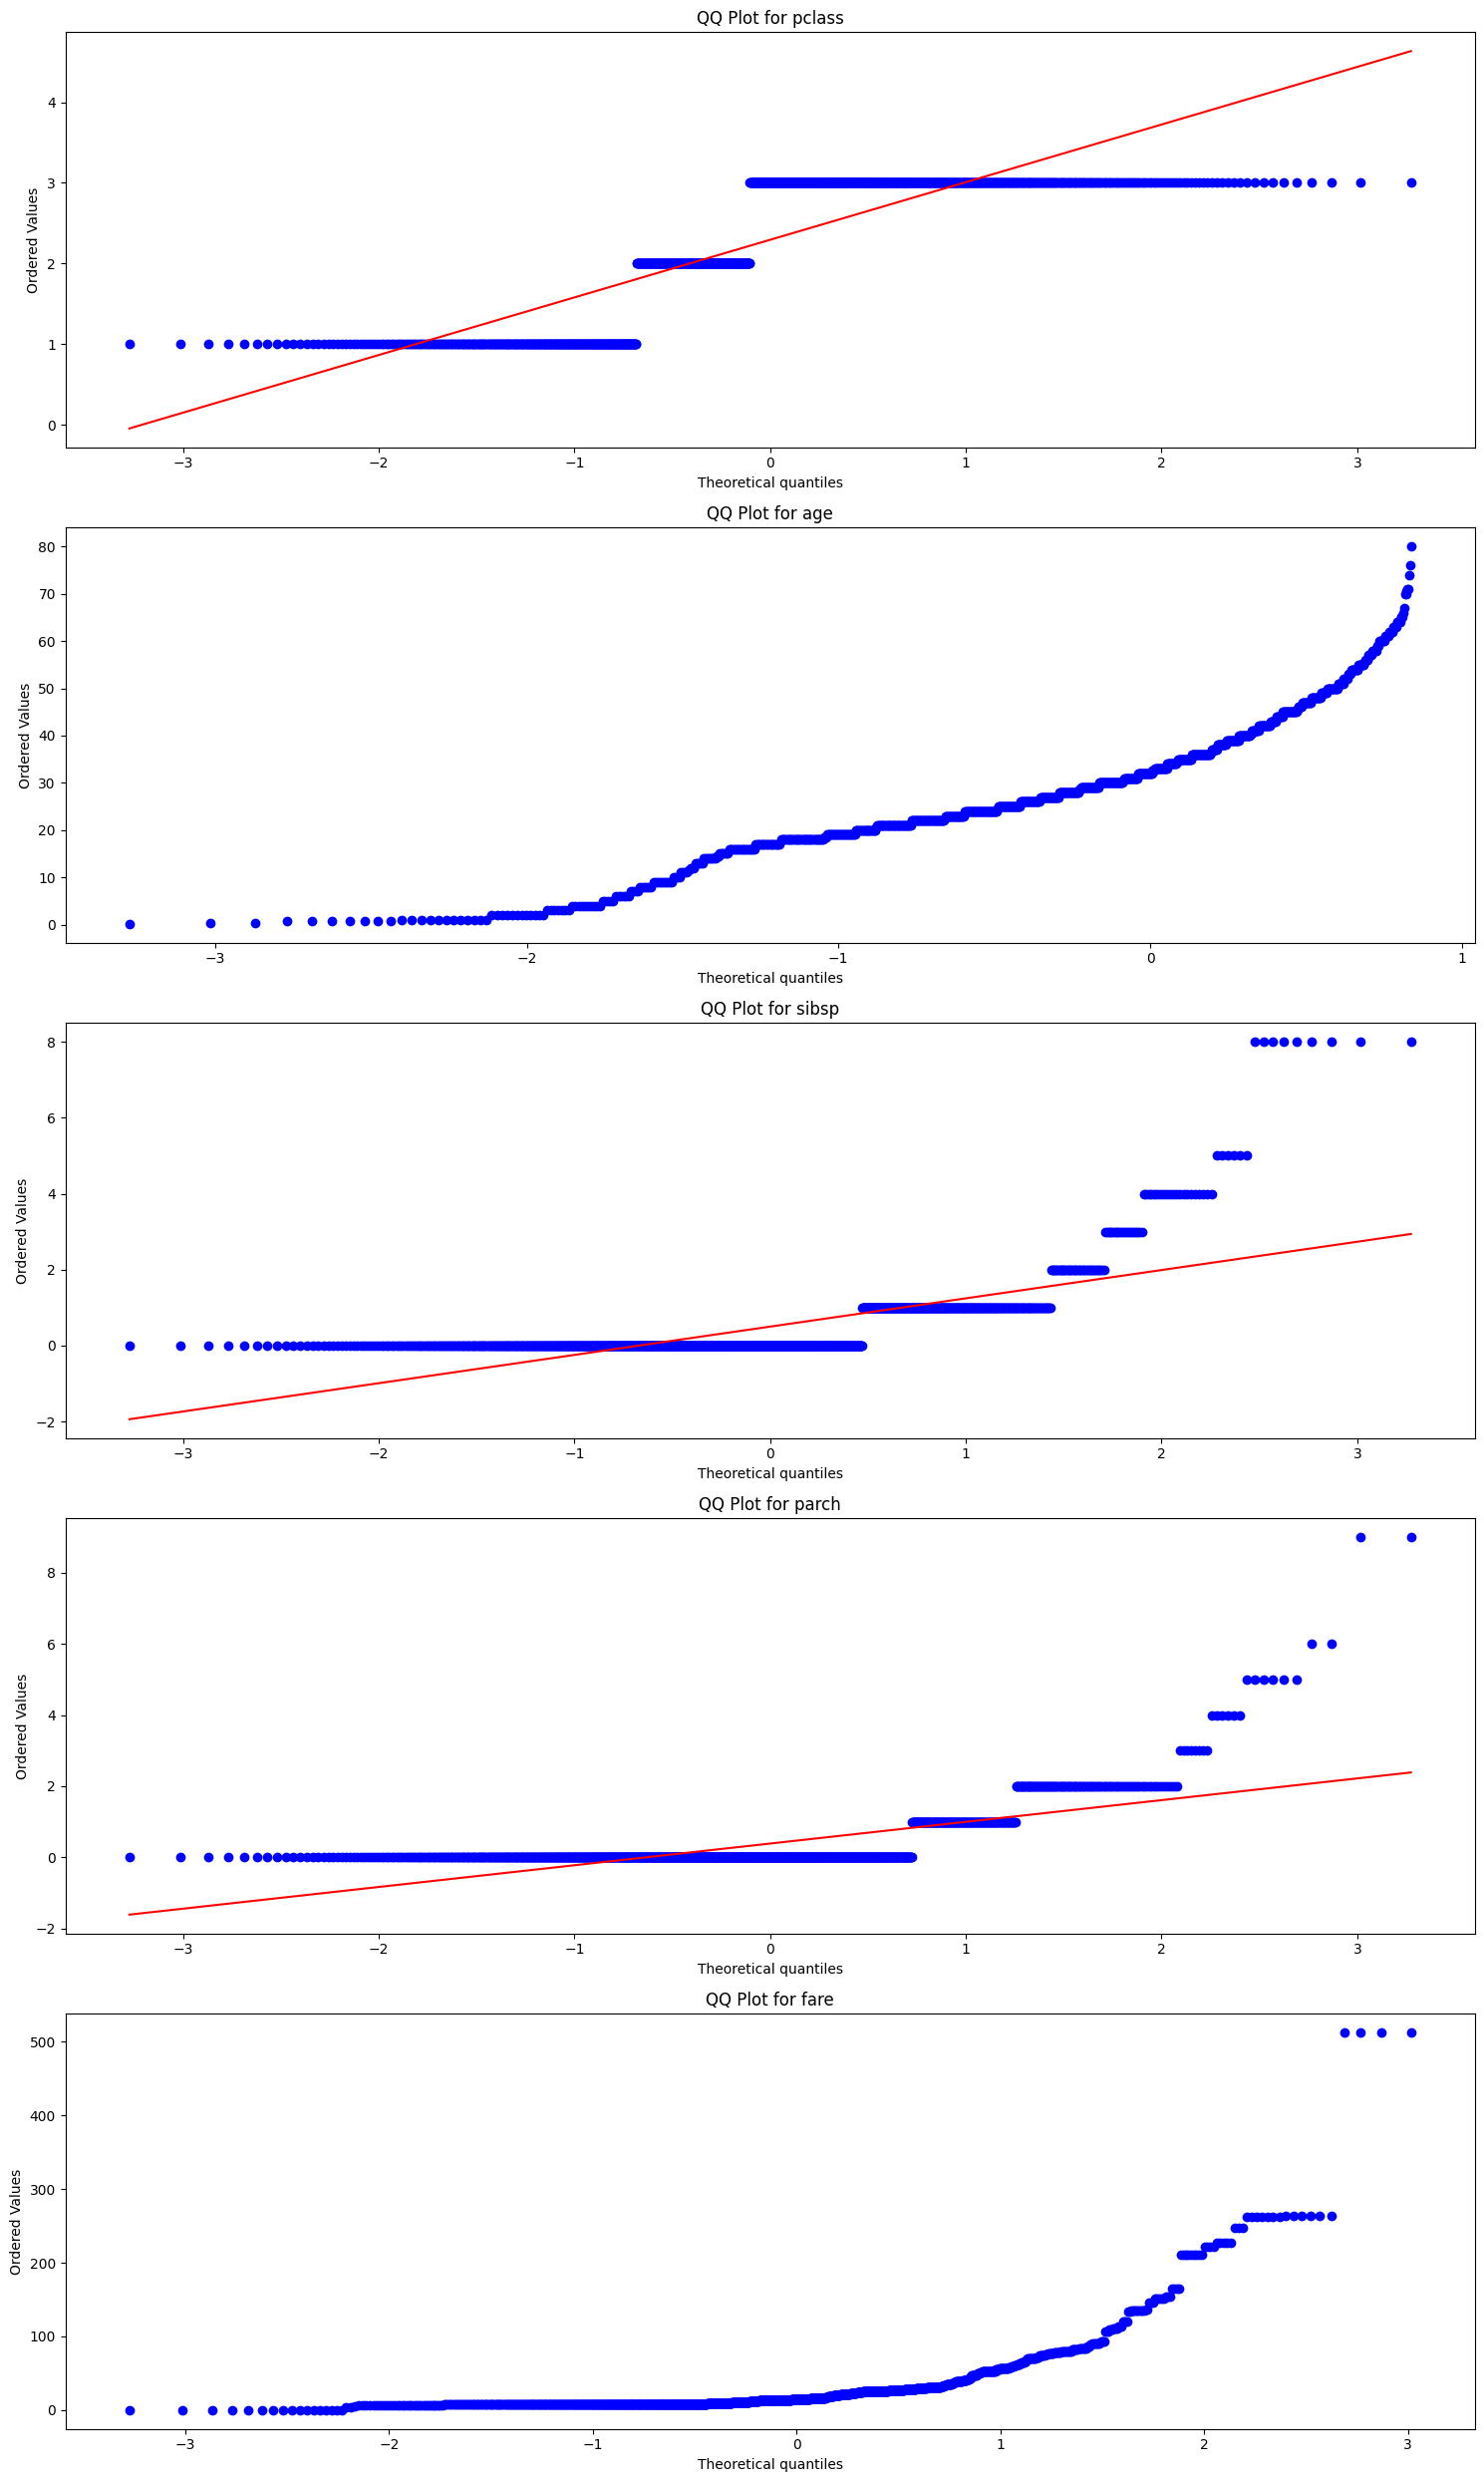

In [11]:
def QQplot_for_df(X):
    # Select only numeric columns
    features = X.select_dtypes(include=['float64', 'int64']).columns
    # Generate QQ plots
    plt.figure(figsize=(15, 5 * len(features)))
    for i, feature in enumerate(features):
        print(f"Generating QQ plot for: {feature}")
        plt.subplot(len(features), 1, i + 1)
        stats.probplot(X[feature], dist="norm", plot=plt)
        plt.title(f'QQ Plot for {feature}')

    plt.tight_layout()
    plt.show()

# Call the function
QQplot_for_df(df_encoded)


### 4 - Data Preprocessing

In [12]:
#@title 4A - Delete unhelpful features

# Add your code below

# Drop non-predictive features
df_encoded.drop(['name', 'ticket', 'home.dest'], axis=1, errors='ignore', inplace=True)

# Verify the changes
print(df_encoded.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Columns: 2796 entries, pclass to survived_1
dtypes: bool(2791), float64(2), int64(3)
memory usage: 3.5 MB
None


In [13]:
#@title 4B - Handle missing values

# Add your code below
# Handle missing values
#Fill missing numeric values with the median
df_encoded.fillna(df_encoded.median(numeric_only=True), inplace=True)

#Drop columns if too many missing values remain (threshold: 50%)
df_encoded.dropna(axis=1, thresh=int(0.5 * len(df_encoded)), inplace=True)

#Drop rows if any missing values still exist
df_encoded.dropna(axis=0, inplace=True)

# Verify missing values have been handled
print(df_encoded.isnull().sum().sum())


0


#### Regarding Imputation

The most successful way to handle missing values, including age in the Titanic dataset, depends on various factors, including the characteristics of the data and the goals of the analysis. Here are some common approaches that have been used:

1. **Mean/Median Imputation:** Replace missing values with the mean or median of the available values. Median imputation is less sensitive to outliers and skewed distributions than mean imputation.

   ```python
   median_age = df['age'].median()
   df['age'].fillna(median_age, inplace=True)
   ```

2. **Machine Learning-based Imputation:** Use advanced imputation techniques, such as regression models or machine learning algorithms, to predict missing values based on other features. This approach takes into account relationships between variables.

3. **Group-wise Imputation:** Impute missing values based on specific groups or categories in the data. For example, impute ages based on the median age within different passenger classes or embarkation ports.

4. **Random Imputation:** Generate random values based on the distribution of the available data. This method introduces some variability and can be suitable when the distribution is not strongly skewed.

5. **Multiple Imputation:** Generate multiple imputations and analyze the data multiple times to account for uncertainty in the imputed values. This is particularly useful in statistical analyses.

It's important to note that there is no one-size-fits-all solution, and the choice of method depends on the specific characteristics of the data and the goals of the analysis. Additionally, always be aware of potential biases introduced by imputation and consider validating the chosen method.

In practice, the choice of imputation method may depend on the nature of the dataset and the analysis goals. Researchers and analysts often assess the impact of different imputation strategies on their specific analyses and choose the method that provides the most reasonable and unbiased results for their particular context.

### 5. Feature Engineering

In [25]:
#@title 5A - Create at least one engineered feature

# Add your code below

# Create a new feature: family_size (sum of siblings/spouses + parents/children + 1 for self)
df_encoded['family_size'] = df_encoded['sibsp'] + df_encoded['parch'] + 1

# Verify the new feature
print(df_encoded[['sibsp', 'parch', 'family_size']].head(10))

# Create a binary feature to indicate if a passenger is a child (age < 12)
df_encoded['is_child'] = (df_encoded['age'] < 12).astype(int)

# Verify the new feature
print(df_encoded[['age', 'is_child']].head())




   sibsp  parch  family_size
0      0      0            1
1      1      2            4
2      1      2            4
3      1      2            4
4      1      2            4
5      0      0            1
6      1      0            2
7      0      0            1
8      2      0            3
9      0      0            1
       age  is_child
0  29.0000         0
1   0.9167         1
2   2.0000         1
3  30.0000         0
4  25.0000         0


### 5B

The decision to create the features child_indicator and family_size is based on the significant impact of age and family dynamics on survival outcomes during the Titanic disaster. The child_indicator feature captures the well-documented survival advantage granted to children, as the "women and children first" protocol prioritized passengers under 12 years old. Historical records indicate that infants and young children, particularly when accompanied by family, had higher survival rates.

On the other hand, the family_size feature accounts for the influence of family presence. Passengers traveling alone often faced isolation and had lower survival chances, whereas family members could assist each other during evacuation. However, excessively large families sometimes struggled to get everyone onto lifeboats, reducing their survival odds.

Together, these features provide the model with a clearer understanding of the relationship between age, family structure, and survival probability, capturing essential social and demographic patterns that strongly influenced survival rates.

### 6. Data Visualization of Survival by Feature - 6A-6C

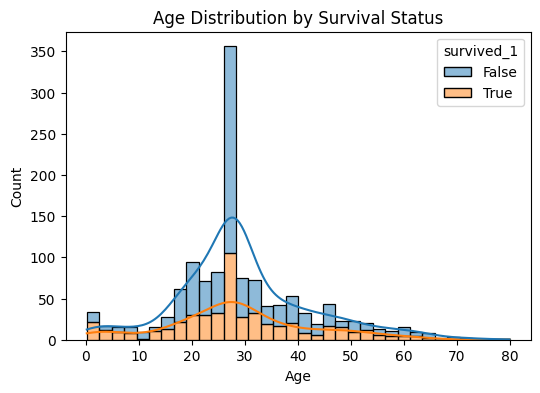

In [22]:
# Histogram: Age Distribution by Survival Status
plt.figure(figsize=(6, 4))
sns.histplot(data=df_encoded, x='age', hue='survived_1', multiple='stack', kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

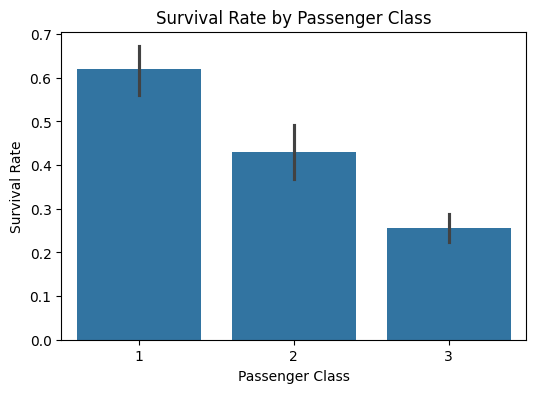

In [23]:
# Survival Rate by Passenger Class (Bar Plot)
plt.figure(figsize=(6, 4))
sns.barplot(x='pclass', y='survived_1', data=df_encoded)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

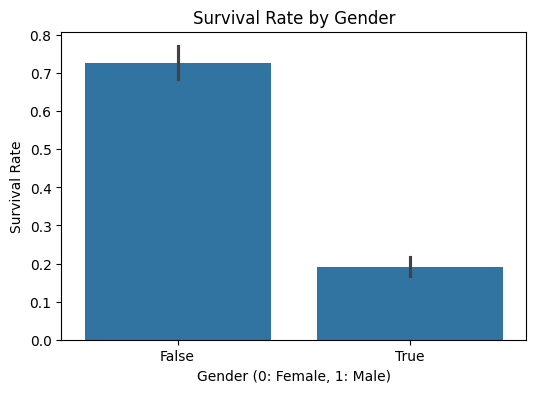

In [24]:
# Bar Chart: Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='sex_male', y='survived_1', data=df_encoded)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Survival Rate')
plt.show()

### 7. Report

###**Age Distribution by Survival Status**
The histogram depicting the **age distribution by survival status** shows a clear trend:
- **Young children**, particularly those under the age of **12**, had a noticeably **higher survival rate** compared to adults.
- Passengers aged **20–30** represented the largest group, but their survival rates were significantly lower.
- The KDE curves indicate that **infants (e.g., age 0.91)** had **higher survival rates**, consistent with the **"women and children first"** evacuation protocol.

###**Survival Rate by Passenger Class**
The bar chart demonstrating survival rates across **passenger classes** highlights a clear class-based survival disparity:
- **First-class passengers** had the **highest survival rate** (above **60%**), likely due to **proximity to lifeboats** and **better accommodations**.
- **Second-class passengers** had **moderate survival rates** (45%), while **third-class passengers** had the lowest survival rate (25%), likely due to **restricted access to lifeboats** and **lower deck placement**.

###**Survival Rate by Gender**
The **gender-based survival bar chart** confirms the **gender-based survival bias**:
- **Female passengers** had a **survival rate exceeding 70%**, reflecting the **"women and children first"** rule.
- **Male passengers** had a **much lower survival rate** (20%), especially in the **third class**, indicating the priority given to **women and children** during the evacuation.

###**QQ-Plots for Numeric Features**
The **QQ plots** for the selected numeric features revealed deviations from a normal distribution:
- **`age`** and **`fare`** exhibit heavy tails, indicating potential **skewness**.
- **`sibsp`** and **`parch`** show distinct **discrete patterns**, highlighting the **family structure** within the dataset.
- **`pclass`** shows clear discrete levels, representing the **three ticket classes**.

###**Pair Plot Analysis**
The **pair plot** provides insights into inter-feature relationships:
- **Survivors** (orange) are clustered around **lower age values** and **higher fare amounts**.
- **Family-related features** like **`sibsp`** and **`parch`** display patterns where **small family sizes** were associated with **higher survival rates**.

###**Feature Engineering Insights**
The introduction of the **`family_size`** and **`is_child`** features uncovered meaningful patterns:
- **Family size**: **Moderate family sizes** (3–4 members) were more likely to survive than **large or solo travelers**.
- **Child indicator**: **Children under 12** showed **higher survival rates**, confirming the importance of age in survival outcomes.

###**Conclusion**
The analysis of the Titanic dataset reveals distinct survival patterns influenced by **age, gender, family size, class, and fare**.
- **Young children and women** had **significantly higher survival rates**.
- **First-class passengers** experienced **better survival outcomes** compared to lower classes.
- **Family size** and **child status** are **significant predictors** of survival, as shown through **feature engineering** and **visual analysis**.

###**Patterns and Insights for Further Analysis**
- **Ticket Prefix Analysis:** Analyzing ticket prefixes might reveal group travel patterns and socio-economic differences.
- **Cabin Location Impact:** Investigating cabin assignments could show how deck levels affected survival rates.
- **Title Extraction from Names:** Extracting titles like Mr., Mrs., and Master might provide insights into gender and social status impacts.

